In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt


In [325]:
img_iseg = nib.load("/Users/pierre-luc-delisle/Data/Direct/iSEG/Training/T1/subject-1-T1.nii").get_fdata().transpose(2, 1, 0)
img_mrbrains = nib.load("/Users/pierre-luc-delisle/Data/Direct/MRBrainS/DataNii/TrainingData/1/T1_1mm.nii").get_fdata().transpose(2, 1, 0)

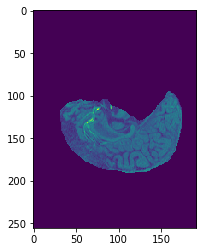

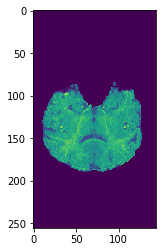

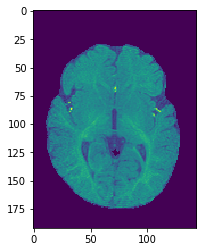

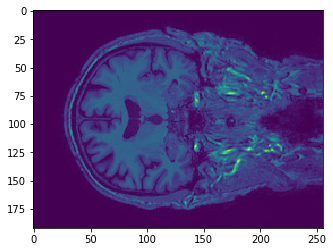

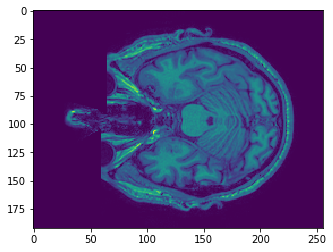

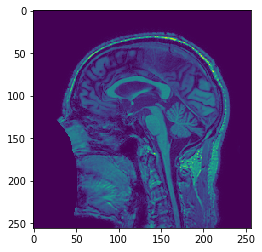

In [326]:
img_iseg_transformed = img_iseg
plt.imshow(img_iseg_transformed[:, :, 72])
plt.show()
plt.imshow(img_iseg_transformed[:, 96, :])
plt.show()
plt.imshow(img_iseg_transformed[128, :, :])
plt.show()

img_mrbrains_transformed = img_mrbrains
plt.imshow(img_mrbrains_transformed[:, :, 128])
plt.show()
plt.imshow(img_mrbrains_transformed[:, 128, :])
plt.show()
plt.imshow(img_mrbrains_transformed[96, :, :])
plt.show()

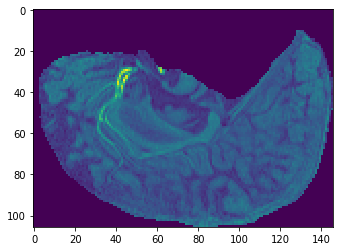

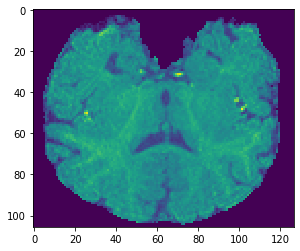

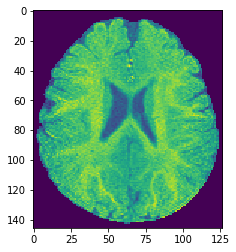

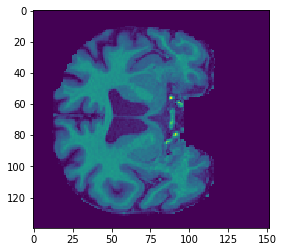

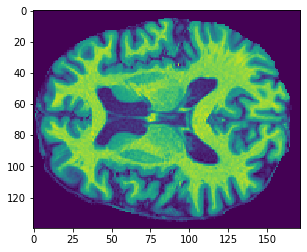

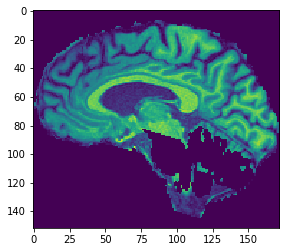

In [327]:
img_iseg = nib.load("/Users/pierre-luc-delisle/Data/Preprocessed/iSEG/Normalized/T1/subject-1-T1.nii").get_fdata().transpose(3, 2, 1, 0)
img_mrbrains = nib.load("/Users/pierre-luc-delisle/Data/Preprocessed/MRBrainS/Normalized/1/T1_1mm.nii").get_fdata().transpose(3, 2, 1, 0)

img_iseg_transformed = img_iseg.squeeze(0)
plt.imshow(img_iseg_transformed[:, :, 64])
plt.show()
plt.imshow(img_iseg_transformed[:, 64, :])
plt.show()
plt.imshow(img_iseg_transformed[64, :, :])
plt.show()

img_mrbrains_transformed = img_mrbrains.squeeze(0)
plt.imshow(img_mrbrains_transformed[:, :, 64])
plt.show()
plt.imshow(img_mrbrains_transformed[:, 64, :])
plt.show()
plt.imshow(img_mrbrains_transformed[64, :, :])
plt.show()


In [328]:
img_mrbrains_transformed_ = img_mrbrains.transpose(0, 2, 3, 1)

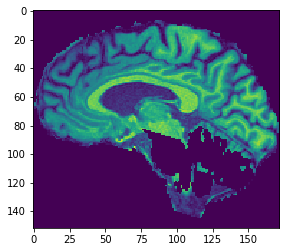

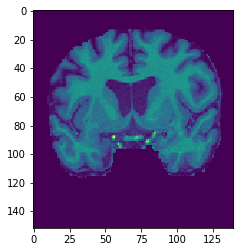

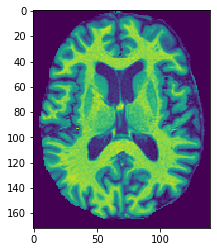

In [329]:
plt.imshow(img_mrbrains_transformed_[:, :, :, 64].squeeze(0))
plt.show()
plt.imshow(img_mrbrains_transformed_[:, :, 64, :].squeeze(0))
plt.show()
plt.imshow(img_mrbrains_transformed_[:, 64, :, :].squeeze(0))
plt.show()

In [330]:
img_iseg_transformed_ = np.fliplr(img_iseg.transpose(0, 1, 2, 3))

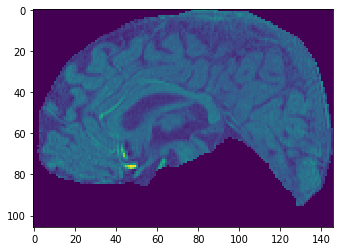

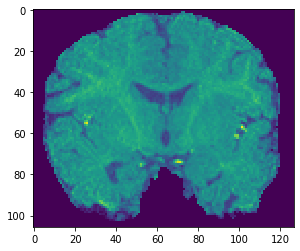

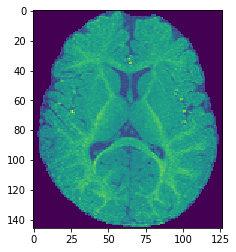

In [331]:
plt.imshow(img_iseg_transformed_[:, :, :, 127//2].squeeze(0))
plt.show()
plt.imshow(img_iseg_transformed_[:, :, 64, :].squeeze(0))
plt.show()
plt.imshow(img_iseg_transformed_[:, 106//2, :, :].squeeze(0))
plt.show()

In [333]:
img_iseg = nib.load("/Users/pierre-luc-delisle/subject-9-T1.nii").get_fdata().transpose(3, 2, 1, 0).squeeze(0)
img_mrbrains = nib.load("/Users/pierre-luc-delisle/T1.nii").get_fdata().transpose(3, 2, 1, 0).squeeze(0)


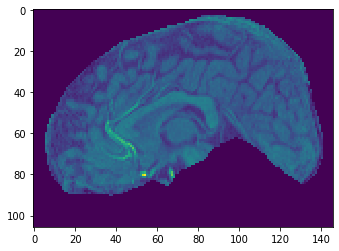

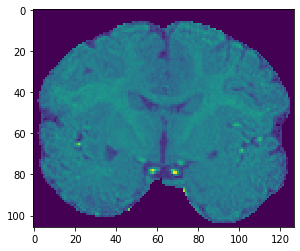

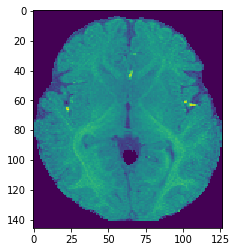

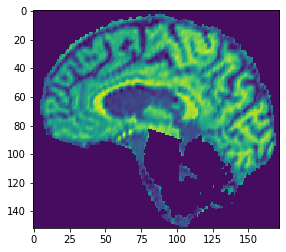

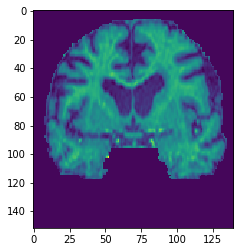

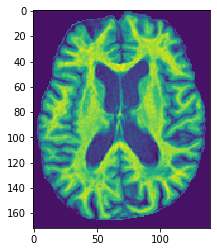

In [334]:
img_iseg_transformed = img_iseg
plt.imshow(img_iseg_transformed[:, :, 64])
plt.show()
plt.imshow(img_iseg_transformed[:, 64, :])
plt.show()
plt.imshow(img_iseg_transformed[64, :, :])
plt.show()

img_mrbrains_transformed = img_mrbrains
plt.imshow(img_mrbrains_transformed[:, :, 64])
plt.show()
plt.imshow(img_mrbrains_transformed[:, 64, :])
plt.show()
plt.imshow(img_mrbrains_transformed[64, :, :])
plt.show()

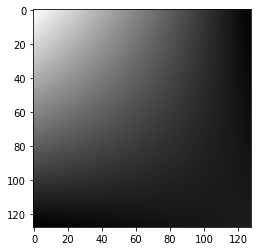

In [52]:
cols = 128
rows = 128
alpha = np.random.normal(0, 1)
x = np.linspace(1-alpha, 1+alpha,cols)
y = np.linspace(1-alpha, 1+alpha, rows)
[X, Y] = np.meshgrid(x, y)
bias = np.multiply(X, Y)
plt.imshow(bias, cmap="gray")
plt.show()

In [53]:
N=3

c = np.polynomial.polynomial.Polynomial.fit(x, y, N)


In [59]:
xr = np.linspace(-4,4, 1)
yr = 2-0.1* np.power(xr, 2)

In [32]:
img = np.multiply(yr, xr)

TypeError: Invalid shape (1,) for image data

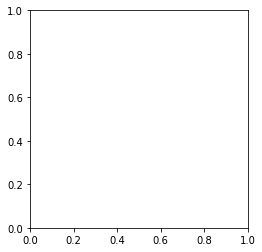

In [33]:
plt.imshow(img)
plt.show()

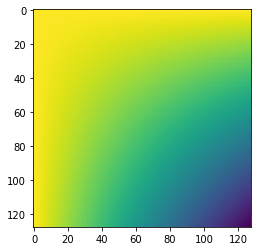

In [18]:
x = np.linspace(0, np.random.normal(0, 1), 128)
y = np.linspace(0, np.random.normal(0, 1), 128)
[X, Y] = np.meshgrid(x, y)
bias = np.multiply(X, Y)
plt.imshow(bias)
plt.show()

In [115]:
c = np.polynomial.polynomial.Polynomial.fit(x, y, 3)


In [116]:
y_f = np.zeros(y.shape)

for i in range(0, N):
    C = c.coef[N-i]
    y_f = y_f + C * np.power(x, i)


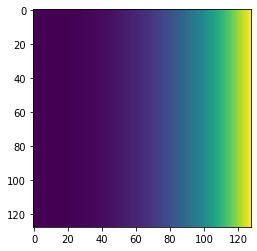

In [121]:
[X, Y] = np.meshgrid(x, y_f)
bias = np.multiply(X, y_f)
plt.imshow(bias)
plt.show()


In [127]:
alpha = np.random.normal(0, 1)
x = np.linspace(1-alpha, 1+alpha,cols)
y = np.linspace(1-alpha, 1+alpha, rows)
c = np.polynomial.legendre.legfit(x, np.multiply(x, y), 3)

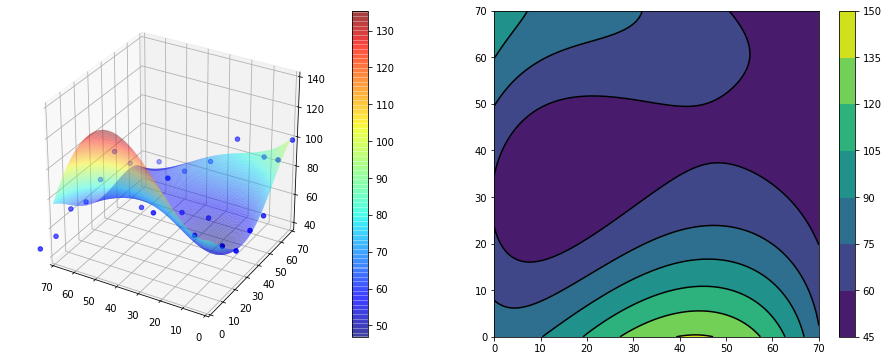

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import random

# The training set
datapoints = np.array([
    [12.5,70,81.32], [25,70,88.54], [37.5,70,67.58], [50,70,55.32], 
    [62.5,70,56.84], [77,70,49.52], [0,11.5,71.32], [77,57.5,67.20], 
    [0,23,58.54], [25,46,51.32], [37.5,46,49.52], [0,34.5,63.22], 
    [25,34.5,48.32], [37.5,34.5,82.30], [50,34.5,56.42], [77,34.5,48.32], 
    [37.5,23,67.32], [0,46,64.20], [77,11.5,41.89], [77,46,55.54], 
    [77,23,52.22], [0,57.5,93.72], [0,70,98.20], [77,0,42.32]
    ])

X = datapoints[:,0:2]
Y = datapoints[:,-1]
# 5 degree polynomial features
deg_of_poly = 4
poly = PolynomialFeatures(degree=deg_of_poly)
X_ = poly.fit_transform(X)
# Fit linear model
clf = linear_model.LinearRegression()
clf.fit(X_, Y)

# The test set, or plotting set
N = 20
Length = 70
predict_x0, predict_x1 = np.meshgrid(np.linspace(0, Length, 128), 
                                     np.linspace(0, Length, 128))
predict_x = np.concatenate((predict_x0.reshape(-1, 1), 
                            predict_x1.reshape(-1, 1)), 
                           axis=1)
predict_x_ = poly.fit_transform(predict_x)
predict_y = clf.predict(predict_x_)

# Plot
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(predict_x0, predict_x1, predict_y.reshape(predict_x0.shape), 
                        rstride=1, cstride=1, cmap=cm.jet, alpha=0.5)
ax1.scatter(datapoints[:, 0], datapoints[:, 1], datapoints[:, 2], c='b', marker='o')

ax1.set_xlim((70, 0))
ax1.set_ylim((0, 70))
fig.colorbar(surf, ax=ax1)
ax2 = fig.add_subplot(122)
cs = ax2.contourf(predict_x0, predict_x1, predict_y.reshape(predict_x0.shape))
ax2.contour(cs, colors='k')
fig.colorbar(cs, ax=ax2)
plt.show()

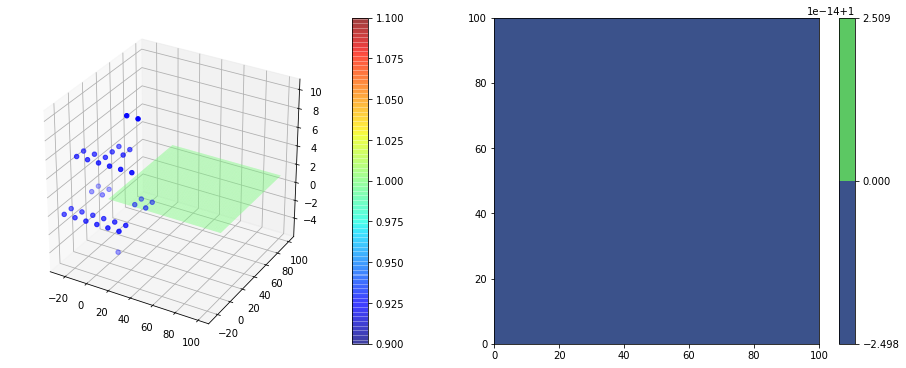

In [15]:
datapoints =  np.array(
    [
        [25.0, -25.0, 0.0, 1.0], [15.0, -25.0, 0.0, 1.0], [5.0, -25.0, 0.0, 1.0],
            [-5.0, -25.0, 0.0, 1.0], [-15.0, -25.0, 0.0, 1.0], [-25.0, -25.0, 0.0, 1.0],
           [25.0, -15.0, 0.0, 1.0], [15.0, -15.0, 0.0, 1.0], [5.0, -15.0, 0.0, 1.0],
            [-5.0, -15.0, 0.0, 1.0], [-15.0, -15.0, 0.0, 1.0], [-25.0, -15.0, 0.0, 1.0],
           [25.0, -5.0, 5.0, 1.0], [15.0, -5.0, 5.0, 1.0], [5.0, -5.0, 5.0, 1.0],
            [-5.0, -5.0, 5.0, 1.0], [-15.0, -5.0, 5.0, 1.0], [-25.0, -5.0, 5.0, 1.0],
           [25.0, 5.0, 10.0, 1.0], [15.0, 5.0, 10.0, 1.0], [5.0, 5.0, -5.0, 1.0],
            [-5.0, 5.0, 5.0, 1.0], [-15.0, 5.0, 5.0, 1.0], [-25.0, 5.0, 5.0, 1.0],
           [25.0, 15.0, 0.0, 1.0], [15.0, 15.0, 0.0, 1.0], [5.0, 15.0, 5.0, 1.0],
            [-5.0, 15.0, 5.0, 1.0], [-15.0, 15.0, 0.0, 1.0], [-25.0, 15.0, 0.0, 1.0],
           [25.0, 25.0, 0.0, 1.0], [15.0, 25.0, 0.0, 1.0], [5.0, 25.0, 5.0, 1.0],
            [-5.0, 25.0, 5.0, 1.0], [-15.0, 25.0, 0.0, 1.0], [-25.0, 25.0, 0.0, 1.0]
    ]
)
X = datapoints[:,0:2]
Y = datapoints[:,3]
# 5 degree polynomial features
deg_of_poly = 5
poly = PolynomialFeatures(degree=deg_of_poly)
X_ = poly.fit_transform(X)
# Fit linear model
clf = linear_model.LinearRegression()
clf.fit(X_, Y)

# The test set, or plotting set
N = 100
Length = 100
predict_x0, predict_x1 = np.meshgrid(np.linspace(0, Length, N), 
                                     np.linspace(0, Length, N))
predict_x = np.concatenate((predict_x0.reshape(-1, 1), 
                            predict_x1.reshape(-1, 1)), 
                           axis=1)
predict_x_ = poly.fit_transform(predict_x)
predict_y = clf.predict(predict_x_)

# Plot
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(predict_x0, predict_x1, predict_y.reshape(predict_x0.shape), 
                        rstride=1, cstride=1, cmap=cm.jet, alpha=0.5)
ax1.scatter(datapoints[:, 0], datapoints[:, 1], datapoints[:, 2], c='b', marker='o')


fig.colorbar(surf, ax=ax1)
ax2 = fig.add_subplot(122)
cs = ax2.contourf(predict_x0, predict_x1, predict_y.reshape(predict_x0.shape))
ax2.contour(cs, colors='k')
fig.colorbar(cs, ax=ax2)
plt.show()


In [10]:
def generate_polynomial(degree, a, b):
    """chooses coefficients for a polynomial of the given degree, such that f(a) == b"""

    #to fit only one data point, we can choose arbitrary values for every coefficient except one, which we initially set to zero.
    coefficients = [0] + [np.random.randint(1, 100) for _ in range(degree-1)]

    #now calculate f(a). This will probably not be equal to b, initially.
    y = sum(coefficient * a**n for n, coefficient in enumerate(coefficients))

    #setting the final coefficient to their difference will cause f(a) to equal b.
    coefficients[0] = b - y

    return coefficients


In [14]:
seq = generate_polynomial(5, 4, np.random.randint(0, 100, 1)[0])



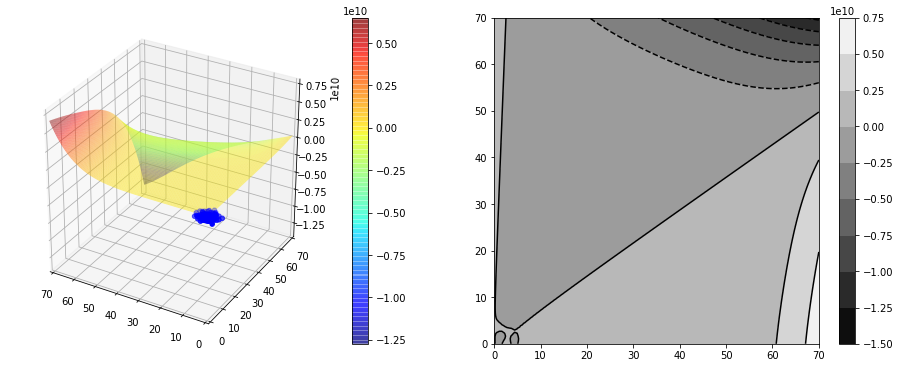

In [14]:
from numpy.polynomial.legendre import legfit

datapoints = np.random.normal(loc=np.random.randn(1), scale=np.random.randint(1, 10), size=(128, 128))
X = datapoints[:,0:2]
Y = datapoints[:,-1]
# 5 degree polynomial features
deg_of_poly = np.random.randint(low=1, high=10, size=(1,))[0]
poly = PolynomialFeatures(degree=deg_of_poly)
X_ = poly.fit_transform(X)
# Fit linear model
clf = linear_model.LinearRegression()
clf.fit(X_, Y)

# The test set, or plotting set
N = 20
Length = 70
predict_x0, predict_x1 = np.meshgrid(np.linspace(0, Length, 128), 
                                     np.linspace(0, Length, 128))
predict_x = np.concatenate((predict_x0.reshape(-1, 1), 
                            predict_x1.reshape(-1, 1)), 
                           axis=1)
predict_x_ = poly.fit_transform(predict_x)
predict_y = clf.predict(predict_x_)

# Plot
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(predict_x0, predict_x1, predict_y.reshape(predict_x0.shape), 
                        rstride=1, cstride=1, cmap=cm.jet, alpha=0.5)
ax1.scatter(datapoints[:, 0], datapoints[:, 1], datapoints[:, 2], c='b', marker='o')

ax1.set_xlim((70, 0))
ax1.set_ylim((0, 70))
fig.colorbar(surf, ax=ax1)
ax2 = fig.add_subplot(122)
cs = ax2.contourf(predict_x0, predict_x1, predict_y.reshape(predict_x0.shape), cmap="gray")
ax2.contour(cs, colors='k')
fig.colorbar(cs, ax=ax2)
plt.show()


In [16]:
from numpy.polynomial.legendre import Legendre

serie = Legendre.basis(4)

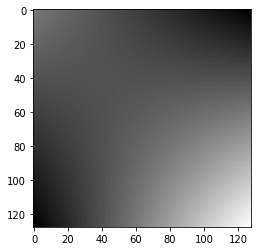

In [45]:
cols = 128
rows = 128
alpha = np.random.normal(0, 1)
x = np.linspace(1-alpha, 1+alpha,cols)
y = np.linspace(1-alpha, 1+alpha, rows)
[X, Y] = np.meshgrid(x, y)
bias = np.multiply(X, Y)
plt.imshow(bias, cmap="gray")
plt.show()

In [70]:
cols = 240
rows = 240
alpha = np.random.normal(0, 1)
x = np.linspace(1-alpha, 1+alpha, cols)
y = np.linspace(1-alpha, 1+alpha, rows)
z = np.linspace(1-alpha, 1+alpha, 48)
[X, Y, Z] = np.meshgrid(x, y, z)
bias = np.multiply(X, Y, Z)

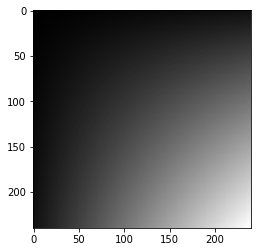

In [71]:
plt.imshow(bias[:, :, 24], cmap="gray")
plt.show()

In [72]:
img_iseg = nib.load("/Users/pierre-luc-delisle/T1.nii").get_fdata()

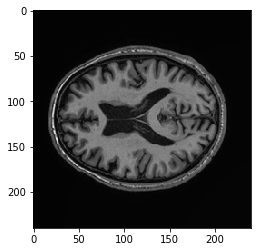

In [73]:
img_with_bias = img_iseg + bias
plt.imshow(img_with_bias[:, :, 24], cmap="gray")
plt.show()


In [75]:
print(img_iseg[120, 120, 24])
print(bias[120, 120, 24])
print(img_with_bias[120, 120, 24])


46.0
1.0073342580716633
47.007334258071666
46.0
1.0073342580716633
47.007334258071666
